In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
from fastai.vision.all import *

     |████████████████████████████████| 719 kB 19.9 MB/s 
     |████████████████████████████████| 441 kB 51.3 MB/s 
     |████████████████████████████████| 1.3 MB 37.9 MB/s 
     |████████████████████████████████| 5.5 MB 36.7 MB/s 
     |████████████████████████████████| 1.6 MB 32.4 MB/s 
     |████████████████████████████████| 95 kB 1.7 MB/s 
     |████████████████████████████████| 163 kB 57.3 MB/s 
     |████████████████████████████████| 115 kB 52.5 MB/s 
     |████████████████████████████████| 212 kB 66.6 MB/s 
     |████████████████████████████████| 127 kB 32.5 MB/s 
     |████████████████████████████████| 115 kB 4.2 MB/s 
     |████████████████████████████████| 7.6 MB 55.5 MB/s 


In [ ]:
!nvidia-smi

Download images from google

https://stackoverflow.com/questions/60987182/trying-to-download-all-of-the-google-search-images-using-javascript

```
var urls = [];
var count = 0;
[...document.querySelectorAll('.rg_i')].forEach((element, index) => {
   let el = element.parentElement.parentElement;
   el.click();
   count++;
   setTimeout(() => {
       let google_url = el.href;

       let start = google_url.indexOf('=' , google_url.indexOf('imgurl'))+1;
       let encoded = google_url.substring(start, google_url.indexOf('&', start));
       let url = decodeURIComponent(encoded);
       urls.push(url);
       console.log(count);
       if(--count == 0) {
          let textToSave = urls.join('\n');
          let hiddenElement = document.createElement('a');
          hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
          hiddenElement.target = '_blank';
          hiddenElement.download = 'urls.txt';
          hiddenElement.click();
       }

   }, 50);

});
```


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
path = Path('/content/drive/MyDrive/pawpatrol')

dog_type = ['chase', 'marshall', 'rocky', 'rouble', 'skye', 'zuma']

In [4]:
if not path.exists():
  path.mkdir()
  for dog in dog_type:
      dest = path/dog
      dest.mkdir(exist_ok=True)
      urls = path.joinpath(dog + '.txt')
      download_images(dest, url_file=urls, max_pics=300)


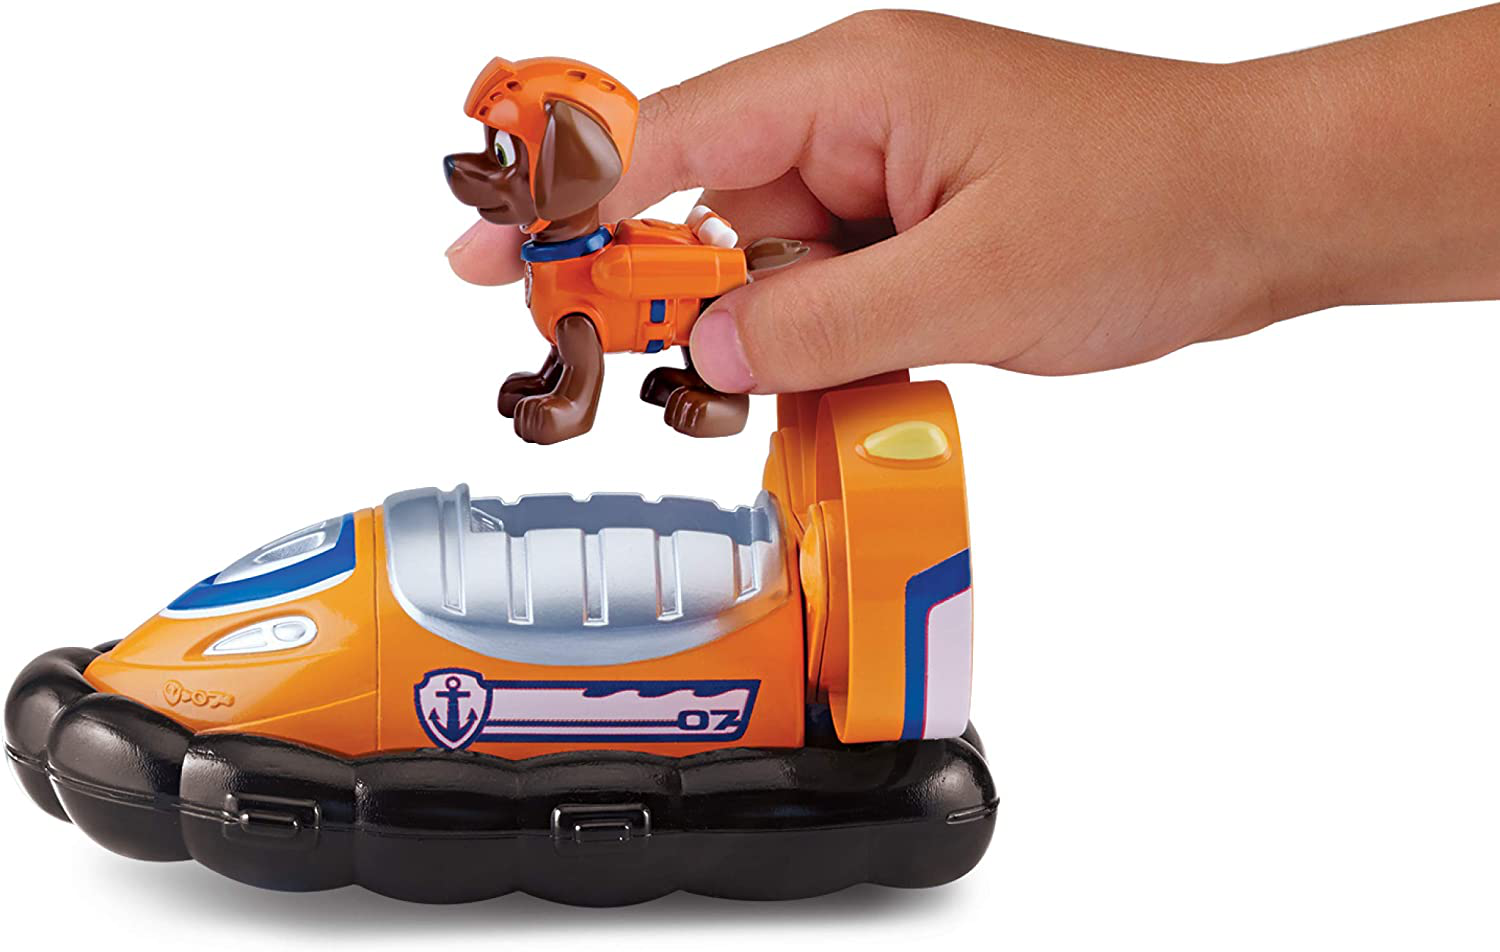

In [5]:
Image.open('/content/drive/MyDrive/paw/zuma/004c6576-c76f-4dbc-ae6b-55826a441247.jpg')

In [6]:
kutyak = get_image_files(path)

In [7]:
len(kutyak)

1568

In [ ]:
hibas = verify_images(kutyak)

In [14]:
len(hibas)

45

In [15]:
hibas.map(Path.unlink)

(#45) [None,None,None,None,None,None,None,None,None,None...]

In [37]:
path

Path('/content/drive/MyDrive/pawpatrol')

In [9]:
dogs = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = (224)
)

In [12]:
dls = dogs.dataloaders(path)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


TypeError: ignored

In [38]:
dls = ImageDataLoaders.from_folder(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    item_tfms=Resize(224, ResizeMethod.Pad), batch_tfms=aug_transforms(mult = 2))

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


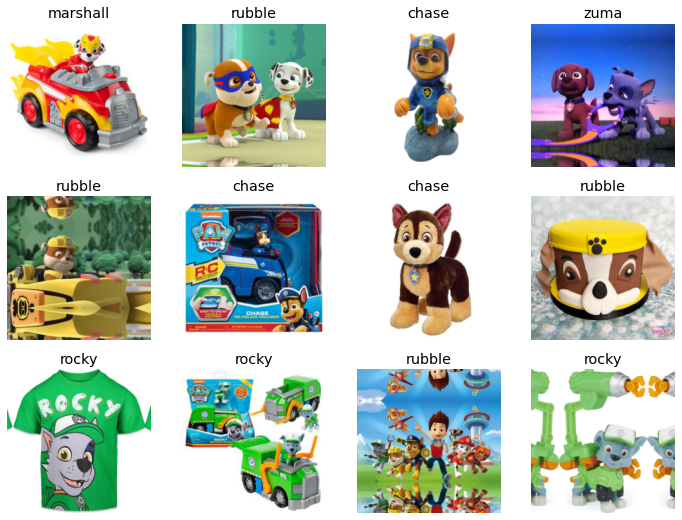

In [39]:
dls.valid.show_batch(max_n= 12, nrows=3)

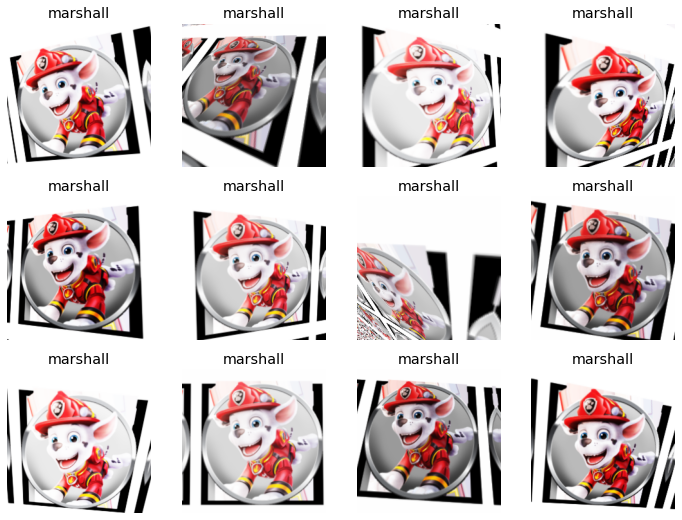

In [25]:
dls.train.show_batch(max_n= 12, nrows=3, unique = True)

In [40]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.212678,0.881709,0.314189,09:22


epoch,train_loss,valid_loss,error_rate,time
0,0.943844,0.647316,0.189189,00:48
1,0.837207,0.554944,0.138514,00:48
2,0.701639,0.521367,0.128378,00:48


In [27]:
learn.export('/content/drive/MyDrive/network18.pkl')

In [28]:
learn.predict('/content/drive/MyDrive/marshall.jpeg')

epoch,train_loss,valid_loss,error_rate,time


('marshall',
 TensorBase(1),
 TensorBase([4.1107e-05, 9.9698e-01, 2.7605e-04, 2.6064e-04, 1.0870e-03, 1.3530e-03]))

In [64]:
dog, _, probs = learn.predict('/content/drive/MyDrive/harom.jpeg')
print(f"Type: {dog}.")
dog_topk(3, probs)

Type: marshall.


[('marshall', 0.33555763959884644),
 ('zuma', 0.3136503994464874),
 ('rocky', 0.246016263961792)]

In [50]:
torch.topk(probs, 2)

torch.return_types.topk(
values=TensorBase([9.9993e-01, 5.1513e-05]),
indices=TensorBase([1, 0]))

In [51]:
dls.vocab

['chase', 'marshall', 'rocky', 'rubble', 'sky', 'zuma']

In [58]:
torch.topk(probs, 2)[0].tolist()

[0.9999312162399292, 5.1513339712983e-05]

In [56]:
result = map(lambda x: dls.vocab[x], torch.topk(probs, 2)[1])
list(result)

['marshall', 'chase']

In [60]:
result = zip(map(lambda x: dls.vocab[x], torch.topk(probs, 2)[1]), torch.topk(probs, 2)[0].tolist())
list(result)

[('marshall', 0.9999312162399292), ('chase', 5.1513339712983e-05)]

In [62]:
def dog_topk(k, probs):
  return list(zip(map(lambda x: dls.vocab[x], torch.topk(probs, k)[1]), torch.topk(probs, k)[0].tolist()))


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


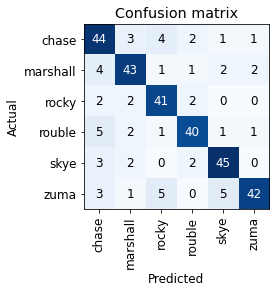

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

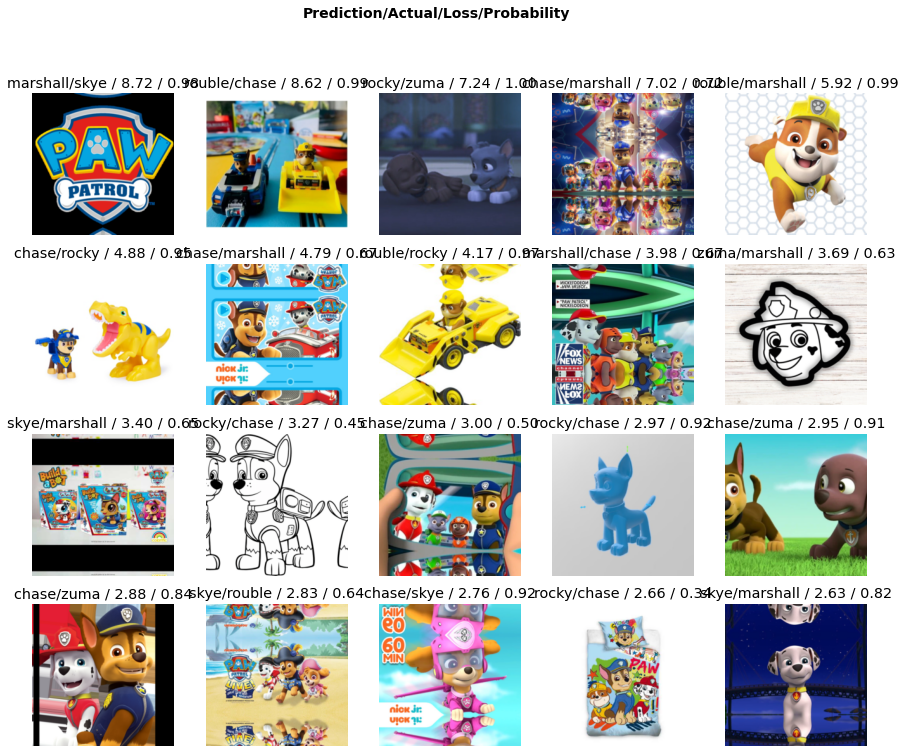

In [31]:
interp.plot_top_losses(20)

In [32]:
from fastai.vision.widgets import *

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner